In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import norm

In [2]:
T = np.array([[0.6, 0.4],[0.4,0.6]]) # state transition matrix
s = 0 # beginning state at inactive state
s_history = np.zeros((100,100))
v_history = np.zeros((100,100))

In [3]:
for k in range(s_history.shape[0]):
    for i in range(s_history.shape[1]):
        s = np.random.choice(2, p=T[s])
        s_history[k,i] = s
        if s == 1:
            v_history[k,i] = s * norm.rvs(size=1, scale=0.1)
        else:
            v_history[k,i] = s

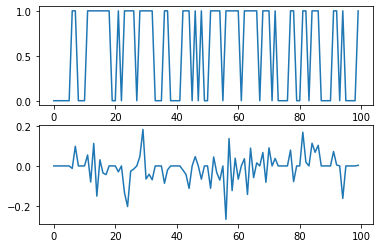

In [5]:
plt.subplot(2,1,1)
for k in range(1):
    plt.plot(s_history[k,:])
plt.subplot(2,1,2)
for k in range(1):
    plt.plot(v_history[k,:])

In [14]:
v_process = np.zeros_like(v_history)
for i in range(v_history.shape[0]):
    v_process[i,:] = np.cumsum(v_history[i,:])

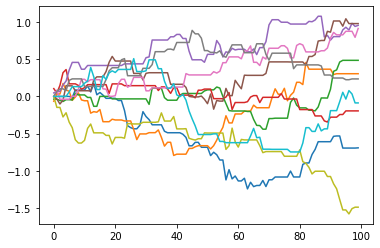

In [15]:
for i in range(10):
    plt.plot(v_process[i,:])

In [17]:
import sklearn
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCA
%matplotlib inline

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [18]:
fdgr = skfda.FDataGrid(v_process, np.arange(100))
fpca = FPCA(n_components=5)
fpca.fit(fdgr)

FPCA(n_components=5,
     weights=array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5]))

In [19]:
fdgr_cov = fdgr.cov().data_matrix[0,:,:,0]

(-0.5, 99.5, 99.5, -0.5)

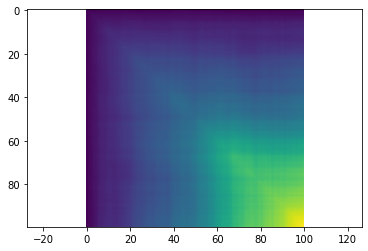

In [20]:
plt.imshow(fdgr_cov)
plt.axis('equal')

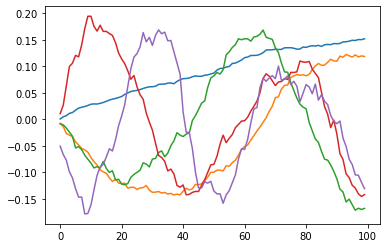

In [21]:
lt,vt = np.linalg.eig(fdgr_cov)
for i in range(5):
    plt.plot(vt[:,i])

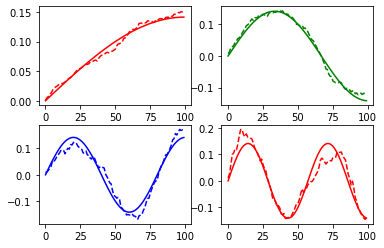

In [23]:
dctb = np.zeros((7,100))
xr = np.arange(100)
for m in range(7):
    dctb[m,:] = np.sqrt(2/100) * np.sin(xr * (2*m-1) * np.pi / (2*100))
orig_y_basis = vt.T
plt.subplot(2,2,1)
plt.plot(xr, dctb[1,:], 'r-')
plt.plot(xr, orig_y_basis[0, :270], 'r--')
plt.subplot(2,2,2)
plt.plot(xr, dctb[2,:], 'g-')
plt.plot(xr, -orig_y_basis[1, :270], 'g--')
plt.subplot(2,2,3)
plt.plot(xr, dctb[3,:], 'b-')
plt.plot(xr, -orig_y_basis[2, :270], 'b--')
plt.subplot(2,2,4)
plt.plot(xr, dctb[4,:], 'r-')
plt.plot(xr, orig_y_basis[3, :270], 'r--')

[0.7865805  0.11347399 0.03965022 0.0159738  0.00803441]


<StemContainer object of 3 artists>

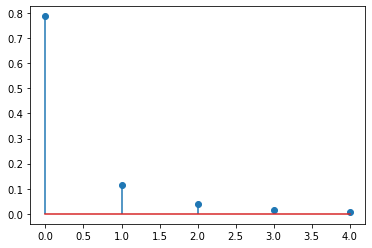

In [26]:
# Test the eigenvalues
print(fpca.explained_variance_ratio_)
plt.stem(fpca.explained_variance_ratio_)

Let's integrate the velocity profiles

In [27]:
v_process.shape

(100, 100)

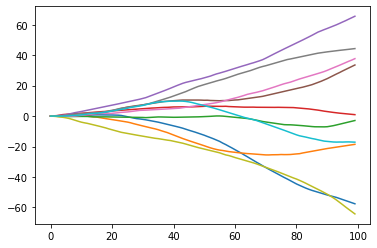

In [30]:
x_process = np.zeros_like(v_process)
for i in range(x_process.shape[0]):
    x_process[i,:] = np.cumsum(v_process[i,:])
for i in range(10):
    plt.plot(x_process[i,:])

(-0.5, 99.5, 99.5, -0.5)

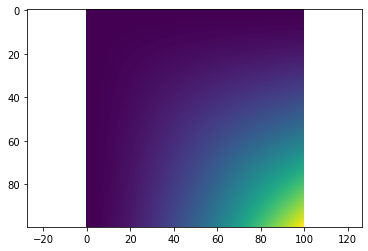

In [32]:
fdgrx = skfda.FDataGrid(x_process, np.arange(100))
fpcax = FPCA(n_components=5)
fpcax.fit(fdgrx)
fdgr_covx = fdgrx.cov().data_matrix[0,:,:,0]
plt.imshow(fdgr_covx)
plt.axis('equal')

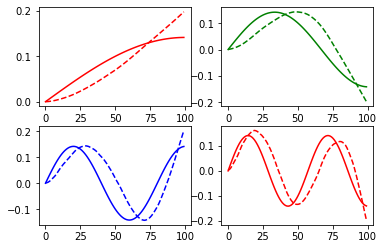

In [36]:
dctb = np.zeros((7,100))
xr = np.arange(100)
for m in range(7):
    dctb[m,:] = np.sqrt(2/100) * np.sin(xr * (2*m-1) * np.pi / (2*100))
orig_x_basis = vtx.T
plt.subplot(2,2,1)
plt.plot(xr, dctb[1,:], 'r-')
plt.plot(xr, orig_x_basis[0, :270], 'r--')
plt.subplot(2,2,2)
plt.plot(xr, dctb[2,:], 'g-')
plt.plot(xr, orig_x_basis[1, :270], 'g--')
plt.subplot(2,2,3)
plt.plot(xr, dctb[3,:], 'b-')
plt.plot(xr, orig_x_basis[2, :270], 'b--')
plt.subplot(2,2,4)
plt.plot(xr, dctb[4,:], 'r-')
plt.plot(xr, orig_x_basis[3, :270], 'r--')

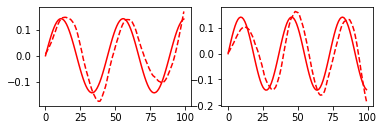

In [37]:
plt.subplot(2,2,1)
plt.plot(xr, dctb[5,:], 'r-')
plt.plot(xr, orig_x_basis[4, :270], 'r--')
plt.subplot(2,2,2)
plt.plot(xr, dctb[6,:], 'r-')
plt.plot(xr, orig_x_basis[5, :270], 'r--')

In [41]:
-np.cos(np.pi)

1.0